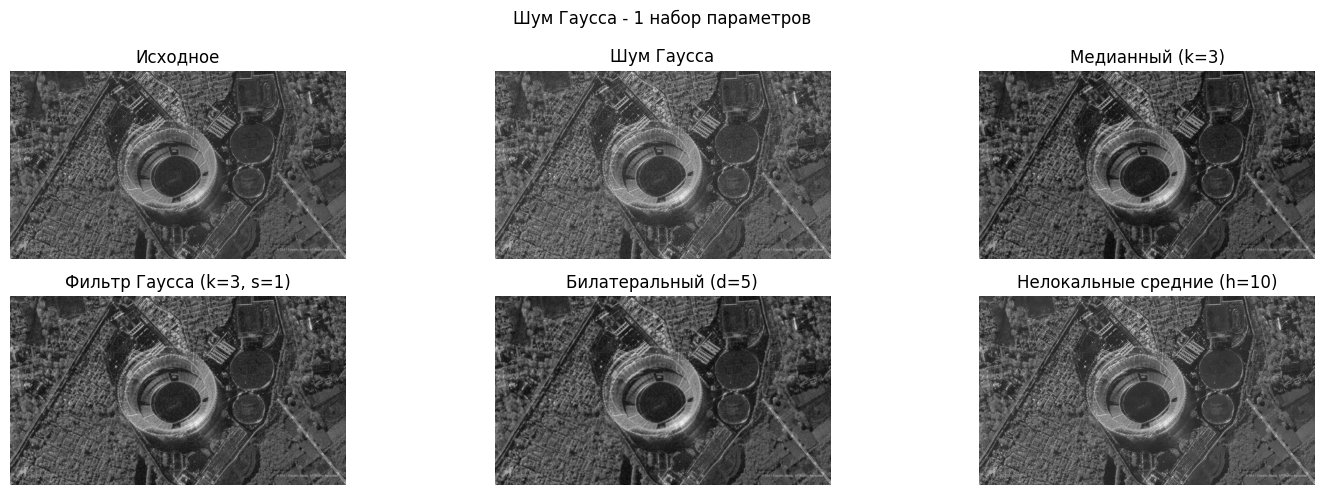

1 набор параметров - Шум Гаусса:
  Медианный: 29.85
  Фильтр Гаусса: 29.04
  Билатеральный: 28.99
  Нелокальные средние: 30.85



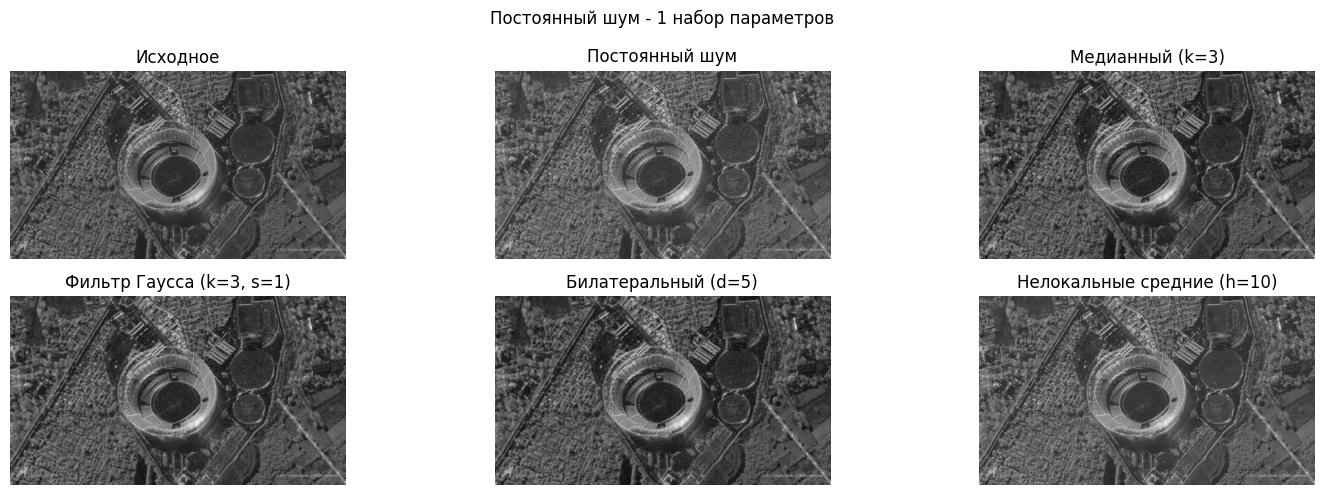

1 набор параметров - Постоянный шум:
  Медианный: 29.43
  Фильтр Гаусса: 28.57
  Билатеральный: 28.57
  Нелокальные средние: 30.64



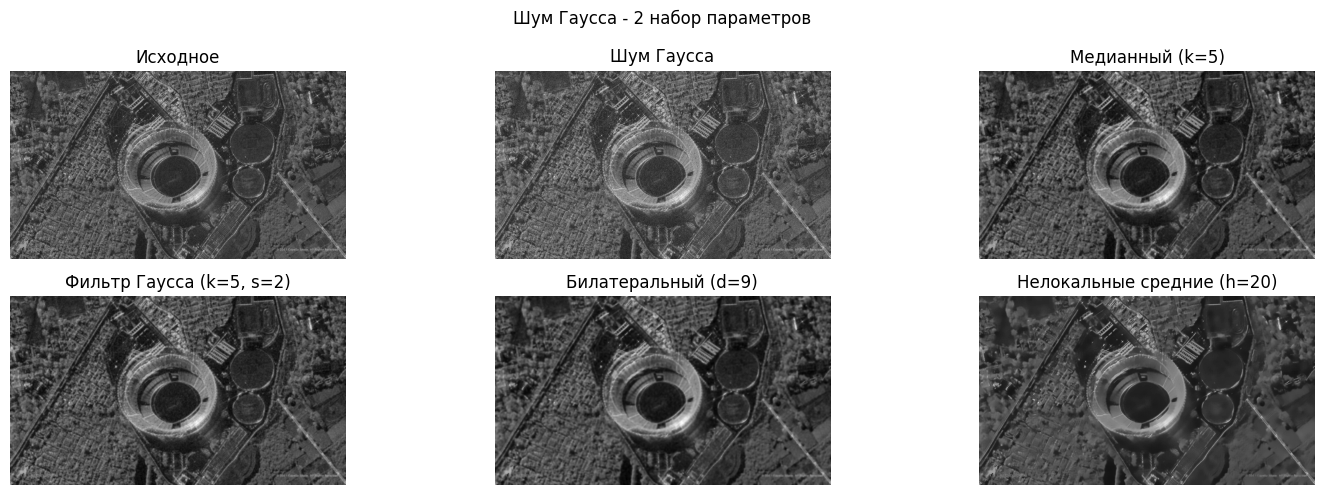

2 набор параметров - Шум Гаусса:
  Медианный: 29.36
  Фильтр Гаусса: 28.81
  Билатеральный: 28.79
  Нелокальные средние: 28.90



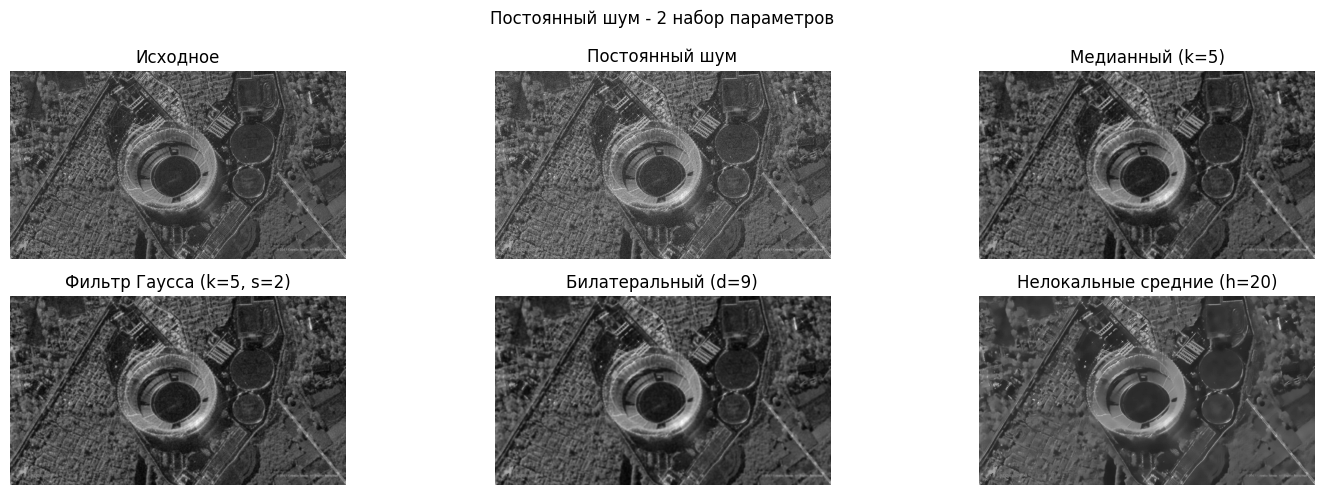

2 набор параметров - Постоянный шум:
  Медианный: 29.06
  Фильтр Гаусса: 28.47
  Билатеральный: 28.47
  Нелокальные средние: 28.60



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(255.0 / np.sqrt(mse))

img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

gauss_noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gauss = cv2.add(img, gauss_noise)

uniform_noise = np.random.uniform(-50, 50, img.shape).astype(np.uint8)
img_uniform = cv2.add(img, uniform_noise)

kernels = [3, 5]
sigmas = [1, 2]
d_params = [5, 9]
h_params = [10, 20]

for i in range(2):
    k = kernels[i]
    s = sigmas[i]
    d = d_params[i]
    h = h_params[i]
    
    med_gauss = cv2.medianBlur(img_gauss, k)
    gauss_gauss = cv2.GaussianBlur(img_gauss, (k, k), s)
    bilateral_gauss = cv2.bilateralFilter(img_gauss, d, 75, 75)
    nlm_gauss = cv2.fastNlMeansDenoising(img_gauss, None, h, 7, 21)
    
    med_uniform = cv2.medianBlur(img_uniform, k)
    gauss_uniform = cv2.GaussianBlur(img_uniform, (k, k), s)
    bilateral_uniform = cv2.bilateralFilter(img_uniform, d, 75, 75)
    nlm_uniform = cv2.fastNlMeansDenoising(img_uniform, None, h, 7, 21)
    
    plt.figure(figsize=(15, 5))
    images_gauss = [img, img_gauss, med_gauss, gauss_gauss, bilateral_gauss, nlm_gauss]
    titles_gauss = ['Исходное', 'Шум Гаусса', 
                   f'Медианный (k={k})', f'Фильтр Гаусса (k={k}, s={s})',
                   f'Билатеральный (d={d})', f'Нелокальные средние (h={h})']
    
    for j in range(6):
        plt.subplot(2, 3, j+1)
        plt.imshow(images_gauss[j], cmap='gray')
        plt.title(titles_gauss[j])
        plt.axis('off')
    
    plt.suptitle(f'Шум Гаусса - {i+1} набор параметров')
    plt.tight_layout()
    plt.show()
    
    print(f"{i+1} набор параметров - Шум Гаусса:")
    print(f"  Медианный: {psnr(img, med_gauss):.2f}")
    print(f"  Фильтр Гаусса: {psnr(img, gauss_gauss):.2f}")
    print(f"  Билатеральный: {psnr(img, bilateral_gauss):.2f}")
    print(f"  Нелокальные средние: {psnr(img, nlm_gauss):.2f}")
    print()
    
    plt.figure(figsize=(15, 5))
    images_uniform = [img, img_uniform, med_uniform, gauss_uniform, bilateral_uniform, nlm_uniform]
    titles_uniform = ['Исходное', 'Постоянный шум', 
                     f'Медианный (k={k})', f'Фильтр Гаусса (k={k}, s={s})',
                     f'Билатеральный (d={d})', f'Нелокальные средние (h={h})']
    
    for j in range(6):
        plt.subplot(2, 3, j+1)
        plt.imshow(images_uniform[j], cmap='gray')
        plt.title(titles_uniform[j])
        plt.axis('off')
    
    plt.suptitle(f'Постоянный шум - {i+1} набор параметров')
    plt.tight_layout()
    plt.show()
    
    print(f"{i+1} набор параметров - Постоянный шум:")
    print(f"  Медианный: {psnr(img, med_uniform):.2f}")
    print(f"  Фильтр Гаусса: {psnr(img, gauss_uniform):.2f}")
    print(f"  Билатеральный: {psnr(img, bilateral_uniform):.2f}")
    print(f"  Нелокальные средние: {psnr(img, nlm_uniform):.2f}")
    print()
    print("С фильтрации Шума Гаусса лучше всех справляется Фильтр нелокальных средних")
    print("С фильтрации Постоянного шума лучше всех справляется Медианный фильтр")